In [8]:
import csv
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lisc.collect import collect_info, collect_counts
from lisc.plts.utils import get_cmap
from lisc.plts.words import plot_years
from lisc.plts.counts import plot_matrix

# Import custom project code
import sys
sys.path.append("/home/b1044271/Columbia/ERPscanr-main/code/")

from plts import plot_year_comparison

In [46]:
# Define the range of the decades to collect information on
start_decade, end_decade = 1990, 2022
decades = list(range(start_decade, end_decade, 10))
    
# Define a list of modalities of interest, with synonyms
modality_terms = [['Aperiodic', '1/f', 'non-oscillatory','spectral slope', 'spectral exponent'], 
                  ['brain oscillations', 'brain rhythms'], 
                  ['neural complexity', 'neural entropy', 'neuronal complexity', 'neuronal entropy']
                 ]
# Define a list of labels to use for the method terms
modality_labels = [lst[0] for lst in modality_terms]

In [37]:
# Notebook settings
SAVE_FIG = False
SAVE_DATA = False
RUN_COLLECTION = True

In [47]:
# Collect information across each decade of interest
if RUN_COLLECTION:
    
    decade_counts = []
    for start_year in decades:

        count, _ = collect_counts(modality_terms,
                                  collect_coocs=False,
                                  mindate=str(start_year) + '/01/01',
                                  maxdate=str(start_year+9) + '/12/31')
        decade_counts.append(count)

    # Convert the collected data into an array, of [n_terms, decade_counts]
    decade_counts = np.array(decade_counts).T
    
    if SAVE_DATA:
        # Save out the collected data for the method counts by decade
        for ind, label in enumerate(modality_labels):
            for decade, count in zip(decades, decade_counts):
                with open(data_dir / 'decades' / (label + '.csv'), 'w') as save_file:
                    for decade, count in zip(decades, decade_counts[ind, :]):
                        save_file.write(str(decade) + ',' + str(count) +'\n')
                        
else:
    decade_counts = []
    for m_term in modality_labels:
        with open(data_dir / 'decades'/ (m_term + '.csv'), 'r') as f_obj:
            count = np.array([row[1] for row in csv.reader(f_obj)], dtype='int')
        decade_counts.append(count)
    decade_counts = np.array(decade_counts)

/home/b1044271/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


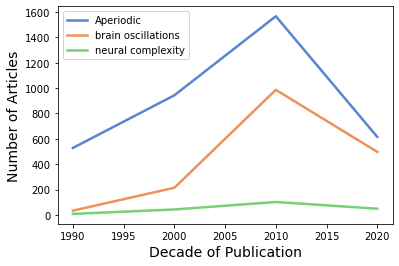

In [48]:
figs_dir = Path('/home/b1044271/Columbia')
data_dir = Path('/home/b1044271/Columbia')

# Plot the popularity of each modality across the decades
plot_year_comparison(decades, decade_counts, modality_labels,
                     save_fig=SAVE_FIG, file_name='modality_decades.pdf', directory=figs_dir)

Number of 1/f papers: 	 3980


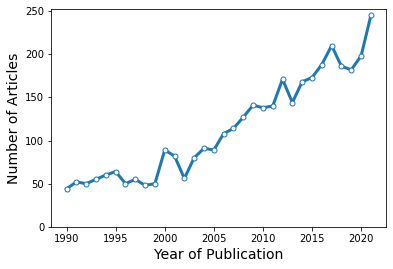

In [31]:
## OVER YEARS now

# Define Aperiodic related search term
aperiodic_term = [["aperiodic", "1/f", "spectral slope", "spectral exponent", "non-oscillatory"]]
# Collect count of the number of papers mentioning 1/f
if RUN_COLLECTION:
    aperiodic_count, meta_data = collect_counts(aperiodic_term, collect_coocs=False)
    
    if SAVE_DATA:        
        # Save out the collected data for the ERP count
        with open(data_dir / 'aperiodic_count.csv', 'w') as save_file:
            save_file.write('aperiodic' + ',' + str(aperioidc_count[0]) +'\n')

else:
    with open(data_dir / 'aperiodic_count.csv', 'r') as f_obj:
        aperiodic_count = np.array([row[1] for row in csv.reader(f_obj)], dtype='int')
# Check the total number of ERP papers found
print('Number of 1/f papers: \t', aperiodic_count[0])

# Define range of years to collect data for
start_year, end_year = 1990, 2022
# Collect count of the number of ERP related papers per year
if RUN_COLLECTION:
    
    year_counts = {}
    for year in range(start_year, end_year):
        temp_count, _ = collect_counts(aperiodic_term, collect_coocs=False, 
                                       mindate=str(year) + '/01/01',
                                       maxdate=str(year) + '/12/31')
        year_counts[year] = temp_count[0]
        
    # Save out the collected data for the method counts by decade
    if SAVE_DATA:
        with open(data_dir / 'aperiodic_years.csv', 'w') as save_file:
             for year, count in year_counts.items():
                save_file.write(str(year) + ',' + str(count) +'\n')
                
else:
    with open(data_dir / 'aperiodic_years.csv', 'r') as f_obj:
        year_counts = {int(row[0]) : int(row[1]) for row in csv.reader(f_obj)}
# Plot the number of ERP papers per year
plot_years(year_counts, fontsize=14, figsize=(6, 4),
           save_fig=SAVE_FIG, file_name='aperiodic_years.pdf', directory=figs_dir)